# Linear Regression on Mobile Call Data

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Fetch Data 

In [43]:
#calldata = pd.read_csv("mobile_cellular_calldata.csv")
calldata = pd.read_csv("mobile_activity.csv")
calldata.head()

,datetime,CellID,provinceName,cell2Province,Province2cell
0,2013-11-07 00:00:00,1,MILANO,0.0018,NaN
1,2013-11-07 00:00:00,1,PAVIA,0.0297,0.0018
2,2013-11-07 00:00:00,2,MILANO,0.0009,NaN
3,2013-11-07 00:00:00,2,PAVIA,0.0292,0.0009
4,2013-11-07 00:00:00,3,PAVIA,0.0287,NaN


In [44]:
calldata.count()

datetime         3341083
CellID           3341083
provinceName     3341083
cell2Province    2086693
Province2cell    2219154
dtype: int64

In [45]:
calldata.describe()

,CellID,cell2Province,Province2cell
count,3.341083e+06,2.086693e+06,2.219154e+06
mean,5.095938e+03,8.714745e-01,8.373577e-01
std,2.743921e+03,4.512704e+00,4.488325e+00
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.874000e+03,3.790000e-02,3.650000e-02
50%,5.133000e+03,1.178000e-01,1.135000e-01
75%,7.371000e+03,3.692000e-01,3.533000e-01
max,1.000000e+04,3.151988e+02,3.429395e+02


In [46]:
calldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341083 entries, 0 to 3341082
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   datetime       object 
 1   CellID         int64  
 2   provinceName   object 
 3   cell2Province  float64
 4   Province2cell  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 127.5+ MB


In [47]:
calldata.columns

Index(['datetime', 'CellID', 'provinceName', 'cell2Province', 'Province2cell'], dtype='object')

# Exploratory Data Analysis ( EDA)

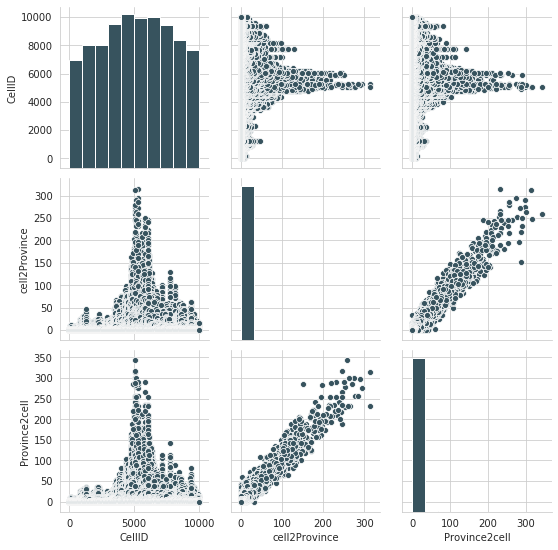

In [48]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.pairplot(calldata)

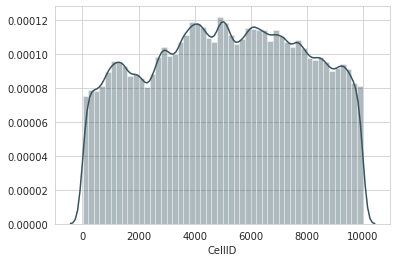

In [49]:
sns.distplot(calldata["CellID"])

## Correlation

In [50]:
calldata.corr()

,CellID,cell2Province,Province2cell
CellID,1.000000,0.045518,0.046731
cell2Province,0.045518,1.000000,0.974180
Province2cell,0.046731,0.974180,1.000000


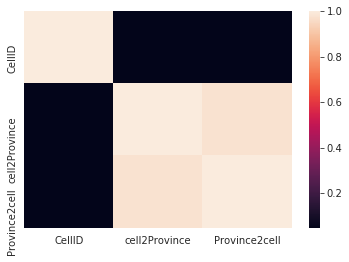

In [51]:
sns.heatmap(calldata.corr())

# Training a Linear Regression Model

In [75]:
# Set X and Y arrays 

X = calldata[['provinceName', 'cell2Province', 'Province2cell']]
y = calldata['CellID']

In [76]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [77]:
# creatinga dn training the model 

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

ValueError: could not convert string to float: 'MONZA E DELLA BRIANZA'